In [50]:
import sys
# sys.path.append(r'E:/0code')
# sys.path.append(r'/home/wyf/0code')
# sys.path.append(r'/home/wangyf226/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import gensim
import re
import smart_open
from pyml.feature_extraction.text import CountVectorizer
from pyml.linear_model.classification import LogisticClassifier
from pyml.neighbors.classification import KNeighborsClassifier
from pyml.neural_network.classification import MLPClassifier
from pyml.metrics.classification import precision_score
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.preprocessing import StandardScaler
from pyml.logger import logger
import logging
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 读取数据集

In [2]:
train_X_vec2doc_2 = np.load('../data/wyf-train_X-doc2vec-500.npy')
test_X_vec2doc_2 = np.load('../data/wyf-test_X-doc2vec-500.npy')
train_Y = np.load('../data/clean/trainY_24000.npy')

In [3]:
train_X = train_X_vec2doc_2
test_X = test_X_vec2doc_2
train_Y = train_Y

# 交叉验证-寻找最好的参数

In [4]:
logger.setLevel(20)
logger.info('test')

[    INFO] - [<ipython-input-4-c82cca1a2a0d>] - [  2] - [  <module>] 
test



## 查看学习率的影响(无mini-batch，无l2正则）

In [18]:
learning_rate_range = [0.03,0.05, 0.1, 0.15, 0.2]
num_iteration = 5000
mini_batch = 0
lambda_l2 = 0
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
for i,learning_rate in enumerate(learning_rate_range):
    for train_indices, test_indices in ms.split(train_X):
        clf = LogisticClassifier(learning_rate=learning_rate, num_iterations=num_iteration, mini_batch=mini_batch, lambda_l2=lambda_l2)
        clf.fit_and_valid(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        y_pred = clf.predict(train_X[test_indices])
        score = precision_score(train_Y[test_indices], y_pred)
        print('i : {} score: {}'.format(i, score))
        models.append(clf)

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:68: RuntimeWarning: divide by zero encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:68: RuntimeWarning: invalid value encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:68: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
[    INFO] - [classification] - [182] - [fit_and_valid] 
train 0/5000  current cost: nan, train: 0.4725520833333333 ,test: 0.47020833333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.49828125 ,test: 0.4975

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.5218229166666667 ,test: 0

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2750/5000  current cost: nan, train: 0.8216145833333334 ,test: 0.7989583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2800/5000  current cost: nan, train: 0.8224479166666666 ,test: 0.7991666666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/5000  current cost: nan, train: 0.82359375 ,test: 0.7991666666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/5000  current cost: nan, train: 0.8238541666666667 ,test: 0.799375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/5000  current cost: nan, train: 0.8246354166666666 ,test: 0.800625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/5000  current cost: nan, train: 0.825625 ,test: 0.801875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/5000  current cost: nan, train: 0.8265625 ,test: 0.8033333333333333

[    INFO] - [classification] - [18

i : 0 score: 0.8210416666666667


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.5322395833333333 ,test: 0.53125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.5680208333333333 ,test: 0.5645833333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.59609375 ,test: 0.596875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.6214583333333333 ,test: 0.620625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.64453125 ,test: 0.6416666666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.6641145833333333 ,test: 0.6633333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.6792708333333334 ,test: 0.6775

[    INFO] - [classification] - [182] - [fit_

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/5000  current cost: nan, train: 0.84203125 ,test: 0.8333333333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/5000  current cost: nan, train: 0.8425 ,test: 0.83375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3150/5000  current cost: nan, train: 0.84296875 ,test: 0.8352083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3200/5000  current cost: nan, train: 0.8436458333333333 ,test: 0.8358333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3250/5000  current cost: 0.5666154969208965, train: 0.84421875 ,test: 0.83625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3300/5000  current cost: 0.5604449151249117, train: 0.84484375 ,test: 0.8358333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3350/5000  current cost: 0.5544253560675148, train: 0.8454166666666667 ,test: 0.8360416666666667


i : 1 score: 0.8385416666666666


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.5986458333333333 ,test: 0.5879166666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.6501041666666667 ,test: 0.6339583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.6879166666666666 ,test: 0.6770833333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.7174479166666666 ,test: 0.7058333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7386458333333333 ,test: 0.724375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.7555208333333333 ,test: 0.7425

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.76875 ,test: 0.755

[    INFO] - [classification] - 

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/5000  current cost: 0.38840946189905823, train: 0.85546875 ,test: 0.8433333333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/5000  current cost: 0.38454368820169665, train: 0.8557291666666667 ,test: 0.8435416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/5000  current cost: 0.38085730968913234, train: 0.85625 ,test: 0.8439583333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3150/5000  current cost: 0.37734379198079915, train: 0.8563541666666666 ,test: 0.8435416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3200/5000  current cost: 0.3739966571685916, train: 0.8569270833333333 ,test: 0.843125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3250/5000  current cost: 0.3708094962129934, train: 0.8571875 ,test: 0.8429166666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3300/

i : 2 score: 0.8539583333333334


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.5732291666666667 ,test: 0.5627083333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.64984375 ,test: 0.6389583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.69875 ,test: 0.6885416666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.7326041666666666 ,test: 0.7202083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.75546875 ,test: 0.7433333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.7723958333333333 ,test: 0.7645833333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.7850520833333333 ,test: 0.773125

[    INFO] - [classific

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/5000  current cost: 0.32507719836795723, train: 0.86390625 ,test: 0.844375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/5000  current cost: 0.3236375756823991, train: 0.8643229166666667 ,test: 0.845625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/5000  current cost: 0.3223133275706754, train: 0.86515625 ,test: 0.8470833333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/5000  current cost: 0.3210952069181304, train: 0.8656770833333334 ,test: 0.8472916666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/5000  current cost: 0.3199746204605961, train: 0.8660416666666667 ,test: 0.8483333333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/5000  current cost: 0.3189436016526176, train: 0.8671354166666667 ,test: 0.8489583333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3150/5

i : 3 score: 0.8554166666666667


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.6121354166666667 ,test: 0.6164583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.6925520833333333 ,test: 0.69375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.7411979166666667 ,test: 0.7439583333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.768125 ,test: 0.77375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7883854166666666 ,test: 0.7858333333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.8025520833333334 ,test: 0.8

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.8127083333333334 ,test: 0.810625

[    INFO] - [classification] - [182] - [fi

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2800/5000  current cost: 0.3105143447542227, train: 0.8705208333333333 ,test: 0.8558333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/5000  current cost: 0.31019856064572116, train: 0.8709375 ,test: 0.85625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/5000  current cost: 0.30990900993918447, train: 0.8709375 ,test: 0.8560416666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/5000  current cost: 0.30964321123952027, train: 0.8709895833333333 ,test: 0.8564583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/5000  current cost: 0.30939894594881767, train: 0.87125 ,test: 0.856875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/5000  current cost: 0.3091742276838099, train: 0.8716666666666667 ,test: 0.8560416666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/5000  curren

i : 4 score: 0.8579166666666667


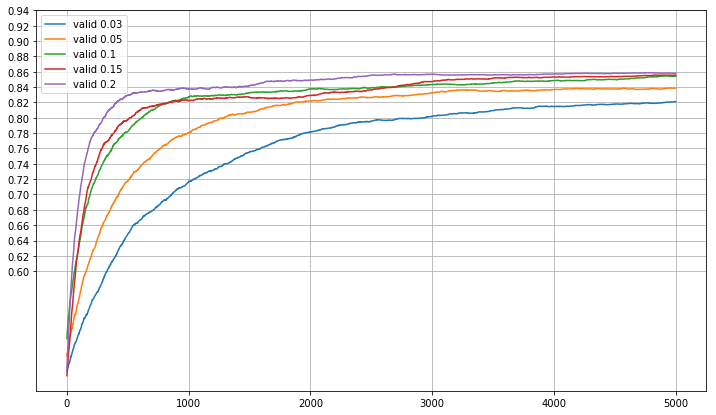

In [24]:
plt.figure(figsize=(12,7)) 
argu_range = learning_rate_range
for i,m in enumerate(models):
    plt.plot(range(0,len(m.information['test_loss'])),m.information['test_loss'],'-',label='valid '+str(argu_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(argu_range[i]) )
    plt.yticks(np.arange(0.6, 0.95, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## L2正则参数的搜索(不开mini-batch)

In [20]:
learning_rate = 0.2
lambda_l2s = [0.0001, 0.001, 0.01,0.05, 0.1, 0.2, 0.5,1, 2, 5,10,100,1000,10000,100000]
num_iteration = 4000
mini_batch = 0

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_2 = []

for train_indices, test_indices in ms.split(train_X):
    for i,lambda_l2 in enumerate(lambda_l2s):
        clf = LogisticClassifier(learning_rate=learning_rate, num_iterations=num_iteration, mini_batch=mini_batch, lambda_l2=lambda_l2)
        clf.fit_and_valid(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        y_pred = clf.predict(train_X[test_indices])
        score = precision_score(train_Y[test_indices], y_pred)
        print('i : {} score: {}'.format(i, score))
        models_2.append(clf)

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:68: RuntimeWarning: divide by zero encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:68: RuntimeWarning: invalid value encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:68: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
[    INFO] - [classification] - [182] - [fit_and_valid] 
train 0/4000  current cost: nan, train: 0.4917708333333333 ,test: 0.4791666666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6205729166666667 ,test: 0.6141666666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.695208

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2650/4000  current cost: 0.3135994628546001, train: 0.87109375 ,test: 0.8472916666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2700/4000  current cost: 0.3128597627084631, train: 0.8713020833333334 ,test: 0.8466666666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2750/4000  current cost: 0.3121846651230082, train: 0.8713541666666667 ,test: 0.8472916666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2800/4000  current cost: 0.3115673409608808, train: 0.8718229166666667 ,test: 0.846875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.31100177853567523, train: 0.8722916666666667 ,test: 0.8464583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.31048268244518423, train: 0.87234375 ,test: 0.845625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/

i : 0 score: 0.8472916666666667


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6031770833333333 ,test: 0.5985416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6846354166666667 ,test: 0.6845833333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7357291666666667 ,test: 0.7335416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.76640625 ,test: 0.761875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7886458333333334 ,test: 0.781875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8036458333333333 ,test: 0.7960416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8132291666666667 ,test: 0.806875

[    INFO] - [classifica

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2800/4000  current cost: 0.30844949383012993, train: 0.8730729166666666 ,test: 0.8439583333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.3080297804801872, train: 0.8731770833333333 ,test: 0.844375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.3076467494833849, train: 0.8731770833333333 ,test: 0.844375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.30729684369810406, train: 0.8733333333333333 ,test: 0.8441666666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.30697687875792223, train: 0.8730208333333334 ,test: 0.84375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.3066840021297042, train: 0.8732291666666666 ,test: 0.8441666666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train

i : 1 score: 0.8452083333333333


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6466666666666666 ,test: 0.64125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.710625 ,test: 0.7054166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.75125 ,test: 0.7408333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7748958333333333 ,test: 0.7645833333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7921354166666666 ,test: 0.7810416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8056770833333333 ,test: 0.7916666666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8136458333333333 ,test: 0.8016666666666666

[    INFO] - [clas

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.310303886624113, train: 0.8730208333333334 ,test: 0.8477083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.30977943305446015, train: 0.87328125 ,test: 0.8475

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.30929778362251015, train: 0.8734375 ,test: 0.8477083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.3088550989990248, train: 0.8734895833333334 ,test: 0.8479166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.3084479110322535, train: 0.8735416666666667 ,test: 0.848125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/4000  current cost: 0.3080730849478458, train: 0.87359375 ,test: 0.8472916666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3150/4000  curren

i : 2 score: 0.84875


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.59828125 ,test: 0.5989583333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6865625 ,test: 0.6797916666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7336979166666666 ,test: 0.7227083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7652083333333334 ,test: 0.7483333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7878645833333333 ,test: 0.76625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8028125 ,test: 0.780625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8122916666666666 ,test: 0.7939583333333333

[    INFO] - [classification] - [

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.3078243266441947, train: 0.8734895833333334 ,test: 0.849375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.307483983236351, train: 0.87359375 ,test: 0.8495833333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.3071729364194906, train: 0.8732291666666666 ,test: 0.8495833333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.3068883939780131, train: 0.8731770833333333 ,test: 0.8497916666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.30662785173979584, train: 0.87328125 ,test: 0.8502083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/4000  current cost: 0.3063890617543595, train: 0.8736458333333333 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
tra

i : 3 score: 0.8477083333333333


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6396875 ,test: 0.6377083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.7096875 ,test: 0.7004166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7498958333333333 ,test: 0.7414583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.77484375 ,test: 0.7658333333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7938020833333334 ,test: 0.781875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8050520833333333 ,test: 0.7927083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8144270833333334 ,test: 0.8020833333333334

[    INFO] - [classifi

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.30902481089861317, train: 0.8716666666666667 ,test: 0.85

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.3085975129382119, train: 0.8717708333333334 ,test: 0.85

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.3082063516736851, train: 0.8721875 ,test: 0.85

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.30784794644657354, train: 0.8715625 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.3075192605668006, train: 0.871875 ,test: 0.850625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/4000  current cost: 0.30721756384541254, train: 0.8719791666666666 ,test: 0.8502083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3150/4000  current cost: 0.3069403993964163, tra

i : 4 score: 0.85


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.618125 ,test: 0.62125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.696875 ,test: 0.693125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7433854166666667 ,test: 0.7347916666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7710416666666666 ,test: 0.7585416666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.79015625 ,test: 0.778125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8030208333333333 ,test: 0.7916666666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8128645833333333 ,test: 0.7995833333333333

[    INFO] - [classification] - [182] - [fit_

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2800/4000  current cost: 0.3076166869995719, train: 0.8731770833333333 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.30728093138466006, train: 0.8733854166666667 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.30697449052743975, train: 0.8733854166666667 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.30669443982365274, train: 0.8736458333333333 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.30643818136855583, train: 0.87359375 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.3062034040829814, train: 0.8735416666666667 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] 

i : 5 score: 0.8483333333333334


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6505208333333333 ,test: 0.636875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.7149479166666667 ,test: 0.6958333333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7519270833333334 ,test: 0.7314583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.775625 ,test: 0.7566666666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7917708333333333 ,test: 0.7745833333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.80484375 ,test: 0.7885416666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8130208333333333 ,test: 0.7975

[    INFO] - [classificati

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2800/4000  current cost: 0.30990076315747933, train: 0.8719791666666666 ,test: 0.8502083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.3094351401446168, train: 0.8716145833333333 ,test: 0.85

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.30900759640347975, train: 0.8720833333333333 ,test: 0.85

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.30861472613588103, train: 0.8723958333333334 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.3082534553185779, train: 0.8721354166666667 ,test: 0.8504166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.3079210059674804, train: 0.87234375 ,test: 0.8502083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100

i : 6 score: 0.84875


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6117708333333334 ,test: 0.608125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6897395833333333 ,test: 0.6820833333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.73953125 ,test: 0.7304166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7666145833333333 ,test: 0.7589583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7863541666666667 ,test: 0.7777083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8005208333333333 ,test: 0.7897916666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8111979166666666 ,test: 0.8004166666666667

[   

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2800/4000  current cost: 0.31054964256347695, train: 0.8728125 ,test: 0.8485416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.31015096719920077, train: 0.8733333333333333 ,test: 0.848125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.3097837997326079, train: 0.8733333333333333 ,test: 0.8485416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.3094451087185943, train: 0.87359375 ,test: 0.8485416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.3091322019927333, train: 0.8734375 ,test: 0.8491666666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.308842684386843, train: 0.8738020833333333 ,test: 0.8495833333333334

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/4

i : 7 score: 0.8489583333333334


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6421875 ,test: 0.6379166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.7096875 ,test: 0.7035416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.75015625 ,test: 0.7404166666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7734895833333333 ,test: 0.7660416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.79171875 ,test: 0.7797916666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8047395833333333 ,test: 0.7916666666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8144270833333334 ,test: 0.7958333333333333

[    INFO] - [classi

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2850/4000  current cost: 0.3105744162881879, train: 0.8720833333333333 ,test: 0.84875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.3101156135483193, train: 0.8725520833333333 ,test: 0.848125

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.309695714953847, train: 0.8726041666666666 ,test: 0.84875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.3093108741675817, train: 0.8726041666666666 ,test: 0.8485416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.30895767276066144, train: 0.87265625 ,test: 0.84875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/4000  current cost: 0.30863306877734664, train: 0.8725 ,test: 0.849375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3150/4000  current cost: 0.3083343517104827

i : 8 score: 0.84875


[    INFO] - [classification] - [182] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.63859375 ,test: 0.63375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.7084895833333333 ,test: 0.69375

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7490104166666667 ,test: 0.7335416666666666

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.77515625 ,test: 0.7591666666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7935416666666667 ,test: 0.775

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8055729166666666 ,test: 0.785

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8151041666666666 ,test: 0.7939583333333333

[    INFO] - [classification] - [182] - [fit_and_v

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2900/4000  current cost: 0.3117912458495344, train: 0.87375 ,test: 0.8454166666666667

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 2950/4000  current cost: 0.31132908546580806, train: 0.87359375 ,test: 0.8452083333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3000/4000  current cost: 0.3109067385876961, train: 0.8736979166666666 ,test: 0.84625

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3050/4000  current cost: 0.3105204119213443, train: 0.8736458333333333 ,test: 0.846875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3100/4000  current cost: 0.3101667094588425, train: 0.8740104166666667 ,test: 0.846875

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3150/4000  current cost: 0.3098425874332561, train: 0.8739583333333333 ,test: 0.8464583333333333

[    INFO] - [classification] - [182] - [fit_and_valid] 
train 3200/4000  current c

i : 9 score: 0.8477083333333333


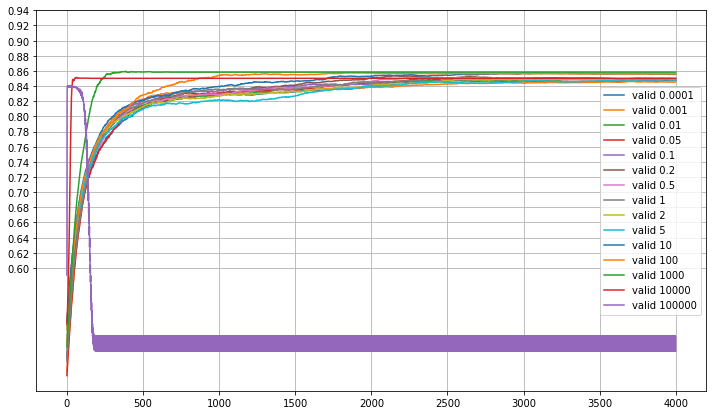

In [29]:
plt.figure(figsize=(12,7)) 
argu_range = lambda_l2s
for i,m in enumerate(models_2):
    plt.plot(range(0,len(m.information['test_loss'])),m.information['test_loss'],'-',label='valid '+str(argu_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(argu_range[i]) )
    plt.yticks(np.arange(0.6, 0.95, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## mini-batch的影响

In [40]:
logger.setLevel(20)
learning_rate = 0.2
lambda_l2s = [0.01,0.1, 1, 2, 5,10,100,1000,10000]
num_iteration = 4000
mini_batch = 4000

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_3 = []

for train_indices, test_indices in ms.split(train_X):
    for i,lambda_l2 in enumerate(lambda_l2s):
        clf = LogisticClassifier(learning_rate=learning_rate, num_iterations=num_iteration, mini_batch=mini_batch, lambda_l2=lambda_l2)
        clf.fit_and_valid(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        y_pred = clf.predict(train_X[test_indices])
        score = precision_score(train_Y[test_indices], y_pred)
        print('i : {} score: {}'.format(i, score))
        models_3.append(clf)

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:114: RuntimeWarning: divide by zero encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:114: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
[    INFO] - [classification] - [228] - [fit_and_valid] 
train 0/4000  current cost: nan, train: 0.4541145833333333 ,test: 0.44458333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.60109375 ,test: 0.5960416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6909895833333334 ,test: 0.6783333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7388541666666667 ,test: 0.7204166666666667

[    INFO] - [classifi

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2600/4000  current cost: 0.3103476363510107, train: 0.8695833333333334 ,test: 0.8541666666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2650/4000  current cost: 0.30980686647772043, train: 0.8695833333333334 ,test: 0.8541666666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2700/4000  current cost: 0.3093137231354741, train: 0.8694791666666667 ,test: 0.8545833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.3088633638385032, train: 0.86984375 ,test: 0.8547916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.30845149827489815, train: 0.8697916666666666 ,test: 0.855

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3080743201935749, train: 0.8702083333333334 ,test: 0.855625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 

i : 0 score: 0.8577083333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6378645833333333 ,test: 0.6272916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.7036458333333333 ,test: 0.69375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7422395833333333 ,test: 0.73

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7666666666666667 ,test: 0.75875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7859895833333334 ,test: 0.775

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.7979166666666667 ,test: 0.7877083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.80875 ,test: 0.796875

[    INFO] - [classification] - [228] - [fit_and_valid] 

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.33497709779034657, train: 0.86953125 ,test: 0.85375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.33444753273845024, train: 0.8694270833333333 ,test: 0.854375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3339625261652291, train: 0.8696354166666667 ,test: 0.8545833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3335178723598412, train: 0.86953125 ,test: 0.855

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.3331098078961023, train: 0.8698958333333333 ,test: 0.854375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.3327349598969903, train: 0.8697916666666666 ,test: 0.8552083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/4000  current cost: 0.33

i : 1 score: 0.858125


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.64 ,test: 0.6279166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6979166666666666 ,test: 0.6839583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7403645833333333 ,test: 0.7266666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.766875 ,test: 0.7552083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.785625 ,test: 0.776875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8015625 ,test: 0.79

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8116666666666666 ,test: 0.8

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 400/4

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.315484422232756, train: 0.8701041666666667 ,test: 0.855

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3151153151952626, train: 0.87015625 ,test: 0.8558333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.31478356135706737, train: 0.8703125 ,test: 0.8564583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3144850863806911, train: 0.8704166666666666 ,test: 0.8560416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.31421629363554104, train: 0.8705208333333333 ,test: 0.85625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.31397400544652315, train: 0.870625 ,test: 0.85625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/4000  current cost: 0.3137

i : 2 score: 0.8560416666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6233854166666667 ,test: 0.6264583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6907291666666666 ,test: 0.6922916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7338020833333333 ,test: 0.7335416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.76328125 ,test: 0.7610416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7819791666666667 ,test: 0.7760416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.7952604166666667 ,test: 0.79

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.805625 ,test: 0.7977083333333334

[    INFO] - [clas

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.31812729061990636, train: 0.8716666666666667 ,test: 0.8597916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.31784051218579823, train: 0.8719270833333334 ,test: 0.8595833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3175828235149554, train: 0.87140625 ,test: 0.86

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3173509459418697, train: 0.8715625 ,test: 0.8595833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.31714199977755075, train: 0.87171875 ,test: 0.8597916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.31695345250252316, train: 0.8718229166666667 ,test: 0.8597916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/4

i : 3 score: 0.8572916666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6531770833333334 ,test: 0.655625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.7126041666666667 ,test: 0.711875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7494270833333333 ,test: 0.7472916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.77453125 ,test: 0.76875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7906770833333333 ,test: 0.7835416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8027083333333334 ,test: 0.7927083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.81140625 ,test: 0.8020833333333334

[    INFO] - [classification] - [

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.32894087785433923, train: 0.87078125 ,test: 0.858125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.32862545698437384, train: 0.8710416666666667 ,test: 0.8579166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3283374626137961, train: 0.8711979166666667 ,test: 0.858125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3280739670262093, train: 0.8710416666666667 ,test: 0.858125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3278324009493725, train: 0.87109375 ,test: 0.8583333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.3276105053236647, train: 0.8713020833333334 ,test: 0.8583333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  curr

i : 4 score: 0.8577083333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6156770833333334 ,test: 0.6145833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6972395833333334 ,test: 0.6991666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7467708333333334 ,test: 0.743125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.776875 ,test: 0.773125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7964583333333334 ,test: 0.79

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.8105729166666666 ,test: 0.8022916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.8201041666666666 ,test: 0.8127083333333334

[    INFO] - [classification] 

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.3258233955654276, train: 0.8732291666666666 ,test: 0.8577083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.32577475967486574, train: 0.87328125 ,test: 0.8577083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.32573089247655734, train: 0.87328125 ,test: 0.8575

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.325691245929983, train: 0.8731770833333333 ,test: 0.8577083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.32565534323494505, train: 0.8732291666666666 ,test: 0.8577083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.3256227686479651, train: 0.87328125 ,test: 0.8577083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/

i : 5 score: 0.8583333333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6407291666666667 ,test: 0.6339583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: 4.152888646479296, train: 0.7299479166666667 ,test: 0.72375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: 2.183859650421941, train: 0.78171875 ,test: 0.7854166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: 1.2275031318989074, train: 0.8140104166666666 ,test: 0.8183333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: 0.7700240473549382, train: 0.8373958333333333 ,test: 0.8372916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 0.5616960404893745, train: 0.8543229166666667 ,test: 0.8527083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  curr

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.40290120769284365, train: 0.870625 ,test: 0.860625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.4029012077101417, train: 0.870625 ,test: 0.860625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.40290120772404925, train: 0.870625 ,test: 0.860625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.40290120773516674, train: 0.870625 ,test: 0.860625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.40290120774400995, train: 0.870625 ,test: 0.860625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.4029012077510142, train: 0.870625 ,test: 0.860625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/4000  current cost: 0.40290120775654137, train: 0.870625 ,test: 0.860625

[    INF

i : 6 score: 0.8608333333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: 0.9381932676951701, train: 0.8124479166666667 ,test: 0.8152083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: 0.588510611563587, train: 0.86015625 ,test: 0.8589583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: 0.5880097208580116, train: 0.8607291666666667 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: 0.5880182972314336, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: 0.5880187616520812, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 0.5880187836754951, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_v

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2650/4000  current cost: 0.5880187848208273, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2700/4000  current cost: 0.5880187848208273, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.5880187848208273, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.5880187848208273, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.5880187848208273, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.5880187848208273, train: 0.8608854166666666 ,test: 0.8570833333333333

[    INFO] - [classification] - [2

i : 7 score: 0.8572916666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2650/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2700/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.6784433900798783, train: 0.8432291666666667 ,test: 0.8433333333333334

[    INFO] - [classification] - [2

i : 8 score: 0.8416666666666667


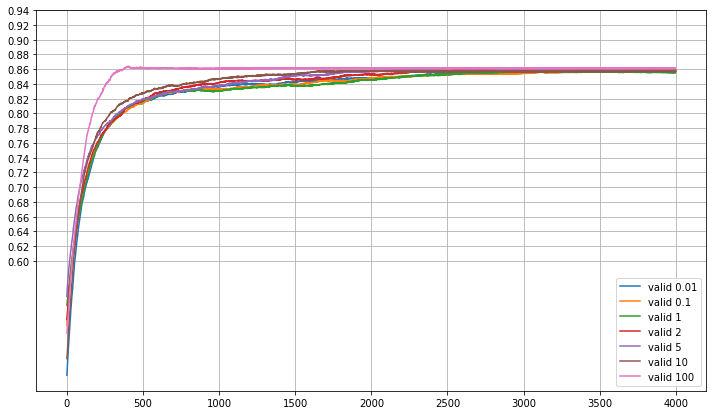

In [48]:
plt.figure(figsize=(12,7)) 
argu_range = lambda_l2s
for i,m in enumerate(models_3[:7]):
    plt.plot(range(0,len(m.information['test_loss'])),m.information['test_loss'],'-',label='valid '+str(argu_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(argu_range[i]) )
    plt.yticks(np.arange(0.6, 0.95, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

In [52]:
logger.setLevel(20)
learning_rate = 0.2
lambda_l2 = 0
num_iteration = 5000
mini_batches = [100,200,400,800,1600,3200,6400,12800]

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_4 = []

for train_indices, test_indices in ms.split(train_X):
    for i,mini_batch in enumerate(mini_batches):
        clf = LogisticClassifier(learning_rate=learning_rate, num_iterations=num_iteration, mini_batch=mini_batch, lambda_l2=lambda_l2)
        clf.fit_and_valid(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        y_pred = clf.predict(train_X[test_indices])
        score = precision_score(train_Y[test_indices], y_pred)
        print('i : {} score: {}'.format(i, score))
        models_4.append(clf)

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 0/5000  current cost: 6.049072529931708, train: 0.5102604166666667 ,test: 0.5089583333333333

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:114: RuntimeWarning: divide by zero encountered in log
  A = sigmoid(np.dot(w.T, X) + b)
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:114: RuntimeWarning: invalid value encountered in multiply
  A = sigmoid(np.dot(w.T, X) + b)
[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: 2.82205236043224, train: 0.63234375 ,test: 0.6254166666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.7066666666666667 ,test: 0.6972916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: 1.1261906097519565, train: 0.75 ,test: 0.7491666666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/50

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2600/5000  current cost: 0.4429479182289318, train: 0.8673958333333334 ,test: 0.8591666666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2650/5000  current cost: 0.2662763414927315, train: 0.8676041666666666 ,test: 0.8545833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2700/5000  current cost: 0.4224117344505735, train: 0.8671354166666667 ,test: 0.8575

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/5000  current cost: 0.2499671170567882, train: 0.8678645833333334 ,test: 0.8575

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/5000  current cost: 0.2640538950716037, train: 0.8660416666666667 ,test: 0.855

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.27067573606067835, train: 0.8661979166666667 ,test: 0.85375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current

i : 0 score: 0.8614583333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: 3.451284485606964, train: 0.61296875 ,test: 0.6002083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: 2.5717040986717463, train: 0.68890625 ,test: 0.671875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.7314583333333333 ,test: 0.723125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.7634375 ,test: 0.7545833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7827083333333333 ,test: 0.768125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/5000  current cost: 1.3055574900785993, train: 0.795625 ,test: 0.778125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/5000  current cost: 1.0467310083397752, train: 0.8072395833333333 ,test: 0.7877083333333333

[ 

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/5000  current cost: 0.30533154315298294, train: 0.8674479166666667 ,test: 0.8527083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/5000  current cost: 0.38885269092786673, train: 0.86734375 ,test: 0.85

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.3318323495582755, train: 0.8676041666666666 ,test: 0.851875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current cost: 0.38128722200917536, train: 0.8684895833333334 ,test: 0.8504166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/5000  current cost: 0.30483898714628815, train: 0.8661979166666667 ,test: 0.854375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/5000  current cost: 0.3963814269844241, train: 0.8675520833333333 ,test: 0.85375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/5000  current c

i : 1 score: 0.86


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.6478125 ,test: 0.6529166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.7134375 ,test: 0.7102083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.7515104166666666 ,test: 0.751875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/5000  current cost: 1.3381413840474243, train: 0.7742708333333334 ,test: 0.78

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7913020833333333 ,test: 0.7972916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/5000  current cost: 0.9768231190155459, train: 0.8040104166666666 ,test: 0.8079166666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/5000  current cost: 1.0359490057111003, train: 0.8127604166666667 ,test: 0.8

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/5000  current cost: 0.36813641474261055, train: 0.8679166666666667 ,test: 0.8597916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/5000  current cost: 0.3259811378724193, train: 0.8689583333333334 ,test: 0.8575

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.3511271946035609, train: 0.8679166666666667 ,test: 0.858125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current cost: 0.26001599019431454, train: 0.8683854166666667 ,test: 0.85875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/5000  current cost: 0.330877974417298, train: 0.8690625 ,test: 0.8602083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/5000  current cost: 0.31680106898674487, train: 0.8695833333333334 ,test: 0.861875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/5000  current co

i : 2 score: 0.8622916666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.6275 ,test: 0.6304166666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.7043229166666667 ,test: 0.7008333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.74515625 ,test: 0.745

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.7725 ,test: 0.770625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7905729166666666 ,test: 0.7845833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.803125 ,test: 0.7935416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/5000  current cost: 0.8631147381401166, train: 0.8124479166666667 ,test: 0.803125

[    INFO] - [classification] - [228] - [fit_a

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/5000  current cost: 0.2856415085877853, train: 0.8677083333333333 ,test: 0.8560416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.30229885044776644, train: 0.8679166666666667 ,test: 0.856875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current cost: 0.32500260837073996, train: 0.8692708333333333 ,test: 0.8577083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/5000  current cost: 0.3211006758199757, train: 0.8690625 ,test: 0.8572916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/5000  current cost: 0.3212387755732128, train: 0.86921875 ,test: 0.8585416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/5000  current cost: 0.3062054907351142, train: 0.8695833333333334 ,test: 0.8575

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/500

i : 3 score: 0.86125


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.63421875 ,test: 0.6439583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.7072916666666667 ,test: 0.7072916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.7459375 ,test: 0.745625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.7686458333333334 ,test: 0.7725

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7857291666666667 ,test: 0.7914583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.7985416666666667 ,test: 0.7997916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.8093229166666667 ,test: 0.8066666666666666

[    INFO] - [classificat

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/5000  current cost: 0.2945198495988367, train: 0.865 ,test: 0.8629166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.30993165290356856, train: 0.86578125 ,test: 0.8608333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current cost: 0.33209826567340645, train: 0.8664583333333333 ,test: 0.8602083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/5000  current cost: 0.3260355883267883, train: 0.86671875 ,test: 0.8602083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/5000  current cost: 0.29292322617477645, train: 0.8669270833333333 ,test: 0.8620833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/5000  current cost: 0.30594183704669226, train: 0.8669791666666666 ,test: 0.8608333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
tr

i : 4 score: 0.8614583333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.6422395833333333 ,test: 0.6352083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.70515625 ,test: 0.6983333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.74234375 ,test: 0.7358333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.768125 ,test: 0.7625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7838541666666666 ,test: 0.7789583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.7972916666666666 ,test: 0.79125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.8075 ,test: 0.800625

[    INFO] - [classification] - [228] - [fit_and_valid] 


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/5000  current cost: 0.3166155452951867, train: 0.8690625 ,test: 0.86125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.31632326221686435, train: 0.8698958333333333 ,test: 0.86125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current cost: 0.3162453971531151, train: 0.8696354166666667 ,test: 0.8616666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/5000  current cost: 0.3148729728696041, train: 0.86984375 ,test: 0.8629166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/5000  current cost: 0.3152982667881147, train: 0.87015625 ,test: 0.8622916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/5000  current cost: 0.3152428951607456, train: 0.87015625 ,test: 0.8627083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/5000  current cost: 

i : 5 score: 0.8627083333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.6144791666666667 ,test: 0.6283333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.688125 ,test: 0.7060416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.73640625 ,test: 0.7439583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.76375 ,test: 0.768125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7840104166666667 ,test: 0.7872916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.7986458333333334 ,test: 0.800625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.8088541666666667 ,test: 0.8097916666666667

[    INFO] - [classification] - [22

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/5000  current cost: 0.3195302235126557, train: 0.86921875 ,test: 0.85875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.31552695846631695, train: 0.8694270833333333 ,test: 0.86

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current cost: 0.30371455780263695, train: 0.8692708333333333 ,test: 0.8604166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/5000  current cost: 0.3183127958818931, train: 0.8697916666666666 ,test: 0.8604166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/5000  current cost: 0.31417410808622814, train: 0.8699479166666667 ,test: 0.860625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/5000  current cost: 0.30284867532713355, train: 0.8697395833333333 ,test: 0.8608333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/5000 

i : 6 score: 0.86125


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/5000  current cost: nan, train: 0.5997916666666666 ,test: 0.6039583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/5000  current cost: nan, train: 0.6808333333333333 ,test: 0.681875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/5000  current cost: nan, train: 0.730625 ,test: 0.7314583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/5000  current cost: nan, train: 0.7610416666666666 ,test: 0.759375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/5000  current cost: nan, train: 0.7834895833333333 ,test: 0.7783333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/5000  current cost: nan, train: 0.7994270833333333 ,test: 0.79125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/5000  current cost: nan, train: 0.8089583333333333 ,test: 0.8045833333333333

[    INFO] - [classificatio

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/5000  current cost: 0.3262621832235857, train: 0.8677604166666667 ,test: 0.8579166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/5000  current cost: 0.3257154440164946, train: 0.8673958333333334 ,test: 0.8585416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/5000  current cost: 0.3252161198907921, train: 0.8674479166666667 ,test: 0.85875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/5000  current cost: 0.32475950881221965, train: 0.8677083333333333 ,test: 0.858125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/5000  current cost: 0.32434142185700415, train: 0.8677083333333333 ,test: 0.8589583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3100/5000  current cost: 0.3239581242598581, train: 0.86765625 ,test: 0.85875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3150/5000

i : 7 score: 0.8608333333333333


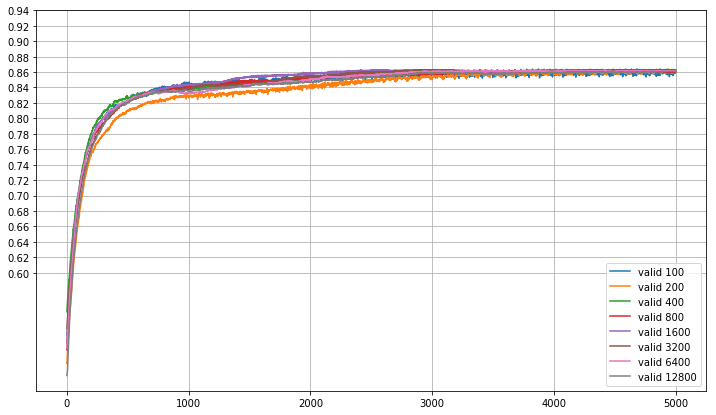

In [53]:
plt.figure(figsize=(12,7)) 
argu_range = mini_batches
for i,m in enumerate(models_4):
    plt.plot(range(0,len(m.information['test_loss'])),m.information['test_loss'],'-',label='valid '+str(argu_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(argu_range[i]) )
    plt.yticks(np.arange(0.6, 0.95, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 正则项

In [55]:
learning_rate = 0.15
lambda_l2s = [0.0001, 0.001, 0.01,0.05, 0.1, 0.2, 0.5,1, 2, 5,10]
num_iteration = 4000
mini_batch = 400

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_5 = []

for train_indices, test_indices in ms.split(train_X):
    for i,lambda_l2 in enumerate(lambda_l2s):
        clf = LogisticClassifier(learning_rate=learning_rate, num_iterations=num_iteration, mini_batch=mini_batch, lambda_l2=lambda_l2)
        clf.fit_and_valid(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        y_pred = clf.predict(train_X[test_indices])
        score = precision_score(train_Y[test_indices], y_pred)
        print('i : {} score: {}'.format(i, score))
        models_5.append(clf)

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:114: RuntimeWarning: divide by zero encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
[    INFO] - [classification] - [228] - [fit_and_valid] 
train 0/4000  current cost: inf, train: 0.5072395833333333 ,test: 0.505625

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:114: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + l2
[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: 3.584922707594848, train: 0.60390625 ,test: 0.5977083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6665625 ,test: 0.6579166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7105729166666667 ,test: 0.703125

[    INFO] - [classification] - [228] 

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2600/4000  current cost: 0.38359204175166767, train: 0.8603645833333333 ,test: 0.851875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2650/4000  current cost: 0.39703926558026076, train: 0.8607291666666667 ,test: 0.8522916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2700/4000  current cost: 0.30780315917969925, train: 0.8608854166666666 ,test: 0.8520833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.302933253655137, train: 0.8613541666666666 ,test: 0.8525

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.31722339875592676, train: 0.8626041666666666 ,test: 0.8525

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3344902193081384, train: 0.86265625 ,test: 0.8522916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000 

i : 0 score: 0.8560416666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.5843229166666667 ,test: 0.5747916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6601041666666667 ,test: 0.6516666666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7086979166666667 ,test: 0.6929166666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.73921875 ,test: 0.725

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7616145833333333 ,test: 0.746875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 1.4489654598221435, train: 0.7783854166666667 ,test: 0.76125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: 1.1183359767766528, train: 0.7886979166666667 ,test: 0.7739583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.3430626946209551, train: 0.8666666666666667 ,test: 0.8495833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.26789799208827686, train: 0.8658854166666666 ,test: 0.8502083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.2928646827844432, train: 0.86703125 ,test: 0.85125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.364486220450298, train: 0.8665104166666666 ,test: 0.8514583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.29704550353081655, train: 0.8672395833333333 ,test: 0.8525

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.34487357223920123, train: 0.8669791666666666 ,test: 0.8514583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 

i : 1 score: 0.8554166666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.5835416666666666 ,test: 0.5702083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6591666666666667 ,test: 0.641875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7069791666666667 ,test: 0.6927083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.73921875 ,test: 0.7216666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7616145833333333 ,test: 0.7416666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 1.2722193472872616, train: 0.7780208333333334 ,test: 0.7583333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.7909895833333334 ,test: 0.7735416

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.35995129851599933, train: 0.8655729166666667 ,test: 0.8477083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3547755249448843, train: 0.8658333333333333 ,test: 0.8485416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3571947707498493, train: 0.8658854166666666 ,test: 0.8495833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.30697345009151494, train: 0.86625 ,test: 0.849375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.3262325119595309, train: 0.8665104166666666 ,test: 0.850625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.37932178628375485, train: 0.8667708333333334 ,test: 0.8510416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train

i : 2 score: 0.8560416666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.60265625 ,test: 0.609375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: 3.0067955548857515, train: 0.6673958333333333 ,test: 0.670625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7125 ,test: 0.7152083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: 1.900523362928765, train: 0.7431770833333333 ,test: 0.7435416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7640104166666667 ,test: 0.7614583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 1.1773029416082674, train: 0.7791145833333334 ,test: 0.7747916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: 1.087609765725738, train: 0.789322916666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.36792197032666624, train: 0.8656770833333334 ,test: 0.849375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3289838723913321, train: 0.8665625 ,test: 0.8502083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3051099774125206, train: 0.8668229166666667 ,test: 0.8516666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.2971722082217103, train: 0.8669791666666666 ,test: 0.8516666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.2835427540794017, train: 0.8671354166666667 ,test: 0.8516666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.3234161323486692, train: 0.8669791666666666 ,test: 0.8520833333333333

[    INFO] - [classification] - [228] - [fit_and_val

i : 3 score: 0.855


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6400520833333333 ,test: 0.6395833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6925520833333333 ,test: 0.6897916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7279166666666667 ,test: 0.7233333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.75234375 ,test: 0.7472916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7699479166666666 ,test: 0.7658333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.7830729166666667 ,test: 0.7777083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.7939583333333333 ,test: 0.786458333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.2618150719089824, train: 0.8644791666666667 ,test: 0.8497916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.3276422904638859, train: 0.8648958333333333 ,test: 0.8491666666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.30327984127891694, train: 0.8655208333333333 ,test: 0.8497916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.34574303041483395, train: 0.8653645833333333 ,test: 0.849375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3540807939330176, train: 0.8652604166666666 ,test: 0.8510416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.3283261764080313, train: 0.8661458333333333 ,test: 0.850625

[    INFO] - [classification] - [228] - [fit_and_val

i : 4 score: 0.8533333333333334


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6255208333333333 ,test: 0.6104166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6842708333333334 ,test: 0.6741666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7209895833333333 ,test: 0.7133333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.74765625 ,test: 0.744375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7674479166666667 ,test: 0.761875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.7819270833333334 ,test: 0.7764583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: nan, train: 0.7922916666666666 ,test: 0.789375

[    INFO] - [classifica

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.35073474679273864, train: 0.8671354166666667 ,test: 0.8489583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.37843214654277085, train: 0.8671354166666667 ,test: 0.84875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.31148732904449045, train: 0.86703125 ,test: 0.8497916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3289108644153547, train: 0.8674479166666667 ,test: 0.8508333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.30087890332846023, train: 0.8680208333333334 ,test: 0.8522916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.31873821036549665, train: 0.8677604166666667 ,test: 0.8525

[    INFO] - [classification] - [228] - [fit_and_valid] 
tra

i : 5 score: 0.8572916666666667


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.62390625 ,test: 0.6172916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6825520833333333 ,test: 0.6754166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7202083333333333 ,test: 0.7135416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: 1.7890368621305432, train: 0.74859375 ,test: 0.738125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.76875 ,test: 0.7602083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 1.598163035281708, train: 0.78203125 ,test: 0.774375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: 1.3064431218220447, train: 0.79390625 ,test: 0.7854166666666667

[    

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.3061294741998496, train: 0.87125 ,test: 0.8527083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.3129712609564717, train: 0.8711458333333333 ,test: 0.8541666666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3270791241288888, train: 0.8716145833333333 ,test: 0.8533333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3903916621009566, train: 0.8714583333333333 ,test: 0.853125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3047708639755242, train: 0.8709375 ,test: 0.853125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.2962875012419972, train: 0.87171875 ,test: 0.8525

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  current cost: 0.3505

i : 6 score: 0.8577083333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: 4.195585921032305, train: 0.5927083333333333 ,test: 0.60125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6652604166666667 ,test: 0.6620833333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7073958333333333 ,test: 0.7077083333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7409375 ,test: 0.738125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7636979166666666 ,test: 0.7579166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: nan, train: 0.7790104166666667 ,test: 0.7720833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: 1.8984124882888922, train: 0.7933854166666666 ,test: 0.7875


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.3525223047747095, train: 0.8694791666666667 ,test: 0.8570833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.34904560334180246, train: 0.87015625 ,test: 0.8583333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.3503902640308412, train: 0.8696354166666667 ,test: 0.8575

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3179590998742864, train: 0.8696354166666667 ,test: 0.858125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3693119844955438, train: 0.8696875 ,test: 0.8579166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.3342416238848268, train: 0.8702604166666666 ,test: 0.8585416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000

i : 7 score: 0.8570833333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.6169791666666666 ,test: 0.6158333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6802083333333333 ,test: 0.6729166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: nan, train: 0.7222395833333334 ,test: 0.71625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: nan, train: 0.7524479166666667 ,test: 0.7460416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: nan, train: 0.7741145833333334 ,test: 0.7675

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 1.9706441831794694, train: 0.7891145833333333 ,test: 0.7814583333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: 1.8353681642209843, train: 0.8022395833333333 ,test:

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.3404416605693148, train: 0.8705729166666667 ,test: 0.8583333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.35669497846097903, train: 0.8710416666666667 ,test: 0.8583333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.34132895592422796, train: 0.8713020833333334 ,test: 0.8585416666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.3755385164605255, train: 0.8704166666666666 ,test: 0.858125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.3200645292491721, train: 0.8713020833333334 ,test: 0.8583333333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.36258990258895457, train: 0.87140625 ,test: 0.8595833333333334

[    INFO] - [classification] - [228] - [fit_and_

i : 8 score: 0.8577083333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: nan, train: 0.59 ,test: 0.5814583333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: nan, train: 0.6707291666666667 ,test: 0.6575

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: 4.039285227701481, train: 0.7229166666666667 ,test: 0.7095833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: 3.171261771526006, train: 0.7575 ,test: 0.7470833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: 2.3469342237762545, train: 0.7833854166666666 ,test: 0.773125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 1.949349900969969, train: 0.8025520833333334 ,test: 0.7908333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: 1.463363678908551, train: 0.8160416

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.380168738619327, train: 0.8707291666666667 ,test: 0.86

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.3617288977563368, train: 0.8699479166666667 ,test: 0.8604166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.4656688876093824, train: 0.8698958333333333 ,test: 0.8597916666666666

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.4277744777634337, train: 0.8698958333333333 ,test: 0.86125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.4033564459279101, train: 0.8696875 ,test: 0.8604166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.39707655047453333, train: 0.87078125 ,test: 0.8604166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  cu

i : 9 score: 0.8608333333333333


[    INFO] - [classification] - [228] - [fit_and_valid] 
train 50/4000  current cost: 10.403354512339915, train: 0.5933854166666667 ,test: 0.60375

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 100/4000  current cost: 6.0823833279908595, train: 0.6778125 ,test: 0.6910416666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 150/4000  current cost: 3.951895645894889, train: 0.7388541666666667 ,test: 0.7470833333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 200/4000  current cost: 2.3131020388257983, train: 0.7808854166666667 ,test: 0.7808333333333334

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 250/4000  current cost: 1.5453832198865523, train: 0.80703125 ,test: 0.803125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 300/4000  current cost: 1.0697712355291846, train: 0.8266145833333334 ,test: 0.820625

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 350/4000  current cost: 0.7

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2750/4000  current cost: 0.4082555619619389, train: 0.8690104166666667 ,test: 0.86125

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2800/4000  current cost: 0.42904158628195077, train: 0.86921875 ,test: 0.861875

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2850/4000  current cost: 0.42153538496064286, train: 0.8692708333333333 ,test: 0.8627083333333333

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2900/4000  current cost: 0.38594976150965193, train: 0.86859375 ,test: 0.8622916666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 2950/4000  current cost: 0.43568059133538894, train: 0.8684375 ,test: 0.8616666666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3000/4000  current cost: 0.405504049328942, train: 0.8686458333333333 ,test: 0.8604166666666667

[    INFO] - [classification] - [228] - [fit_and_valid] 
train 3050/4000  cur

i : 10 score: 0.8620833333333333


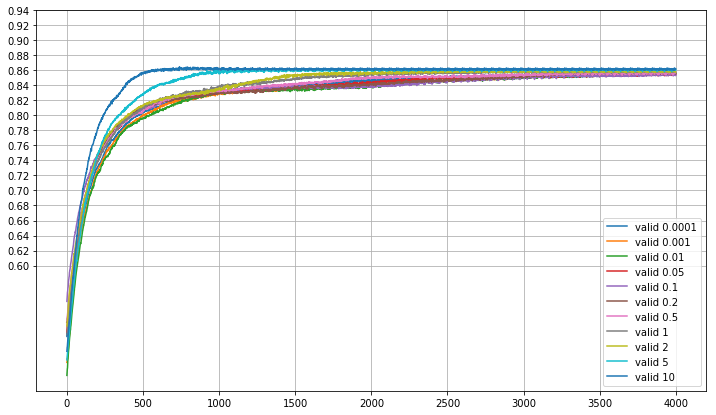

In [64]:
plt.figure(figsize=(12,7)) 
argu_range = lambda_l2s
for i,m in enumerate(models_5):
    plt.plot(range(0,len(m.information['test_loss'])),m.information['test_loss'],'-',label='valid '+str(argu_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(argu_range[i]) )
    plt.yticks(np.arange(0.6, 0.95, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

# 训练模型

In [17]:
clf = LogisticClassifier(learning_rate=0.1, num_iterations=50000)
clf.fit(train_X, train_Y, watch=True)

Cost after iteration 0: 1.922223
Cost after iteration 100: 0.983062
Cost after iteration 200: 0.696180
Cost after iteration 300: 0.575996
Cost after iteration 400: 0.514294
Cost after iteration 500: 0.479213
Cost after iteration 600: 0.458113
Cost after iteration 700: 0.444977
Cost after iteration 800: 0.436613
Cost after iteration 900: 0.431205
Cost after iteration 1000: 0.427670
Cost after iteration 1100: 0.425340
Cost after iteration 1200: 0.423795
Cost after iteration 1300: 0.422764
Cost after iteration 1400: 0.422073
Cost after iteration 1500: 0.421608
Cost after iteration 1600: 0.421293
Cost after iteration 1700: 0.421080
Cost after iteration 1800: 0.420934
Cost after iteration 1900: 0.420835
Cost after iteration 2000: 0.420766
Cost after iteration 2100: 0.420719
Cost after iteration 2200: 0.420686
Cost after iteration 2300: 0.420664
Cost after iteration 2400: 0.420648
Cost after iteration 2500: 0.420637
Cost after iteration 2600: 0.420629
Cost after iteration 2700: 0.420623
Cost

Cost after iteration 22500: 0.420603
Cost after iteration 22600: 0.420603
Cost after iteration 22700: 0.420603
Cost after iteration 22800: 0.420603
Cost after iteration 22900: 0.420603
Cost after iteration 23000: 0.420603
Cost after iteration 23100: 0.420603
Cost after iteration 23200: 0.420603
Cost after iteration 23300: 0.420603
Cost after iteration 23400: 0.420603
Cost after iteration 23500: 0.420603
Cost after iteration 23600: 0.420603
Cost after iteration 23700: 0.420603
Cost after iteration 23800: 0.420603
Cost after iteration 23900: 0.420603
Cost after iteration 24000: 0.420603
Cost after iteration 24100: 0.420603
Cost after iteration 24200: 0.420603
Cost after iteration 24300: 0.420603
Cost after iteration 24400: 0.420603
Cost after iteration 24500: 0.420603
Cost after iteration 24600: 0.420603
Cost after iteration 24700: 0.420603
Cost after iteration 24800: 0.420603
Cost after iteration 24900: 0.420603
Cost after iteration 25000: 0.420603
Cost after iteration 25100: 0.420603
C

Cost after iteration 44700: 0.420603
Cost after iteration 44800: 0.420603
Cost after iteration 44900: 0.420603
Cost after iteration 45000: 0.420603
Cost after iteration 45100: 0.420603
Cost after iteration 45200: 0.420603
Cost after iteration 45300: 0.420603
Cost after iteration 45400: 0.420603
Cost after iteration 45500: 0.420603
Cost after iteration 45600: 0.420603
Cost after iteration 45700: 0.420603
Cost after iteration 45800: 0.420603
Cost after iteration 45900: 0.420603
Cost after iteration 46000: 0.420603
Cost after iteration 46100: 0.420603
Cost after iteration 46200: 0.420603
Cost after iteration 46300: 0.420603
Cost after iteration 46400: 0.420603
Cost after iteration 46500: 0.420603
Cost after iteration 46600: 0.420603
Cost after iteration 46700: 0.420603
Cost after iteration 46800: 0.420603
Cost after iteration 46900: 0.420603
Cost after iteration 47000: 0.420603
Cost after iteration 47100: 0.420603
Cost after iteration 47200: 0.420603
Cost after iteration 47300: 0.420603
C

# 训练模型写入结果

In [18]:
y_pred = clf.predict(test_X)
sub = pd.DataFrame(y_pred)
sub.to_csv('../results/'+'doc2vec-lr-'+ str(datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")) + ".csv", index=0, header=None, index_label=None)